<a href="https://colab.research.google.com/github/j-santillan-cruz/projects/blob/main/Copy_of_StockMarketVaR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import pandas
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use("bmh")
%config InlineBackend.figure_formats=["png"]

In [2]:
 !pip install yahoofinancials

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 543.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.20-py3-none-any.whl size=38617 sha256=6ce746b2dc810125540ee6b3df7db8f06f18faf039ed421db4579e431f6c9359
  Stored in directory: /root/.cache/pip/wheels/cc/6b/dd/7ff776de4ebf7b144bb9562a813be59d0108306f368af9b637
Successfully built yahoofinancials


In [3]:
from yahoofinancials import YahooFinancials
from datetime import datetime

def retrieve_stock_data(ticker, start, end):
    json = YahooFinancials(ticker).get_historical_price_data(start, end, "daily")
    df = pandas.DataFrame(columns=["open","close","adjclose"])
    for row in json[ticker]["prices"]:
        date = datetime.fromisoformat(row["formatted_date"])
        df.loc[date] = [row["open"], row["close"], row["adjclose"]]
    df.index.name = "date"
    return df

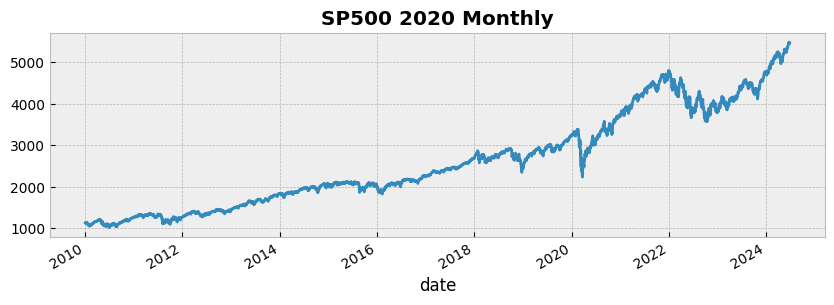

In [6]:
SP500 = retrieve_stock_data("^SPX", "2010-01-01", "2024-06-26")
fig = plt.figure()
fig.set_size_inches(10,3)
SP500["adjclose"].plot()
plt.title("SP500 2020 Monthly", weight="bold");

<Axes: xlabel='date'>

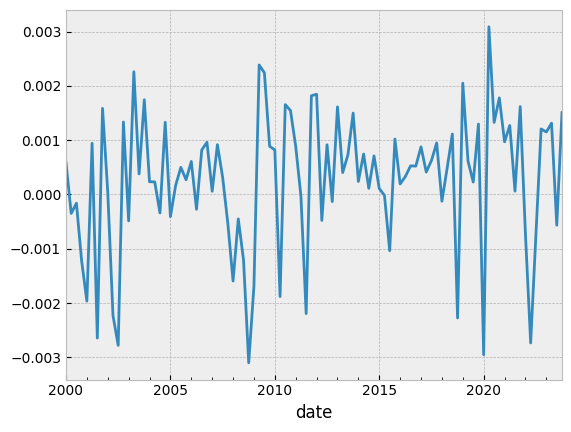

In [ ]:
SP500["adjclose"].pct_change().resample('q').mean().plot()

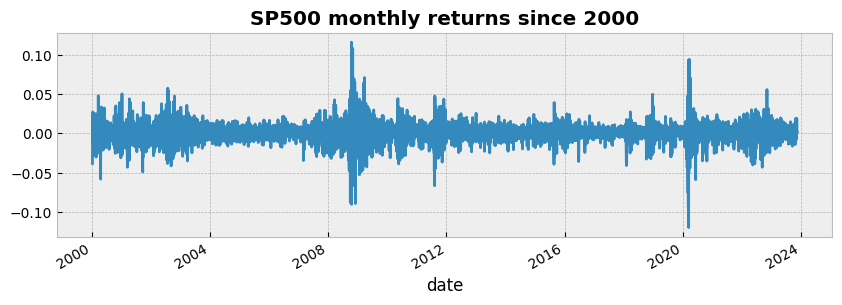

In [ ]:
fig = plt.figure()
fig.set_size_inches(10,3)
SP500["adjclose"].pct_change().plot()
plt.title("SP500 monthly returns since 2000", weight="bold");

0.04443386350872993

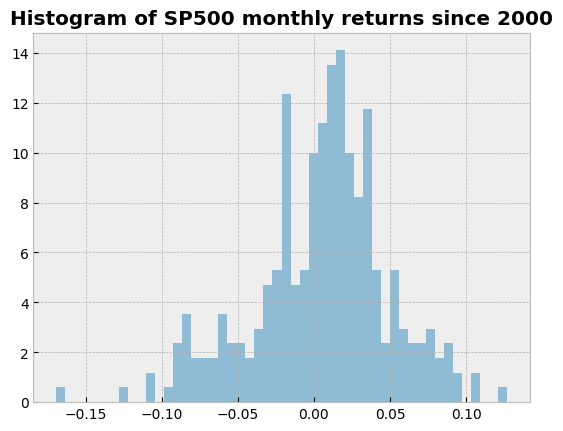

In [ ]:
SP500["adjclose"].pct_change().hist(bins=50, density=True, histtype="stepfilled", alpha=0.5)
plt.title("Histogram of SP500 monthly returns since 2000", weight="bold")
SP500["adjclose"].pct_change().std()

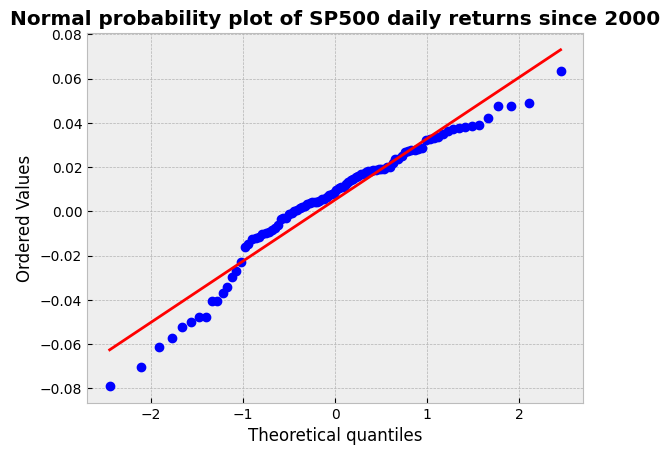

In [ ]:
Q = SP500["adjclose"].pct_change().resample('q').mean().dropna()
scipy.stats.probplot(Q, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111))
plt.title("Normal probability plot of SP500 daily returns since 2000", weight="bold");

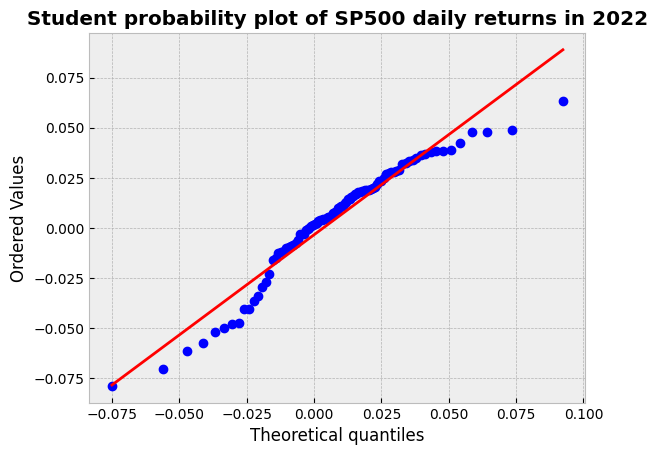

In [ ]:
tdf, tmean, tsigma = scipy.stats.t.fit(Q)
scipy.stats.probplot(Q, dist=scipy.stats.t, sparams=(tdf, tmean, tsigma), plot=plt.figure().add_subplot(111))
plt.title("Student probability plot of SP500 daily returns in 2022", weight="bold");

Value at Risk using the historical bootstrap method

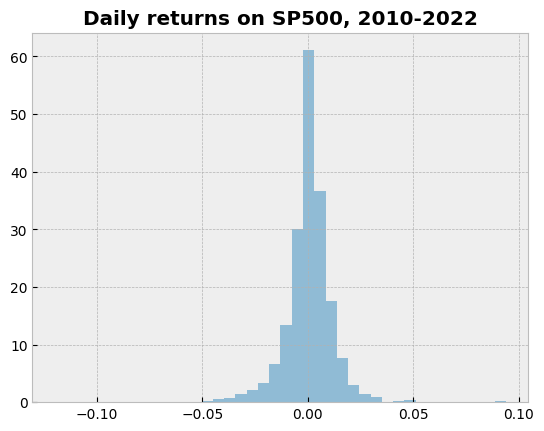

In [ ]:
stock = retrieve_stock_data("^SPX", "2010-01-01", "2022-11-11")
returns = stock["adjclose"].pct_change().dropna()
mean = returns.mean()
sigma = returns.std()
tdf, tmean, tsigma = scipy.stats.t.fit(returns)
returns.hist(bins=40, density=True, histtype="stepfilled", alpha=0.5)
plt.title("Daily returns on SP500, 2010-2022", weight="bold");

In [ ]:
returns.quantile(0.05)

-0.07022887728921637

The 0.05 empirical quantile of daily returns is at -0.0171. That means that with 95% confidence, our minimum daily loss is 1.71%. If we have a 1 M USD investment, our one-day 5% VaR is 0.017 * 1 M USD = 17 k USD

In [ ]:
print("test : {} blablabla {}".format(returns.quantile(0.05),returns.quantile(0.05)))

test : -0.07022887728921637 blablabla -0.07022887728921637


In [ ]:
returns.quantile(0.01)*1000000000

-92537720.02662438

Value at Risk using the variance-covariance method

Method: calculate analytic quantiles by curve fitting to historical data. Here, we use normal distribution

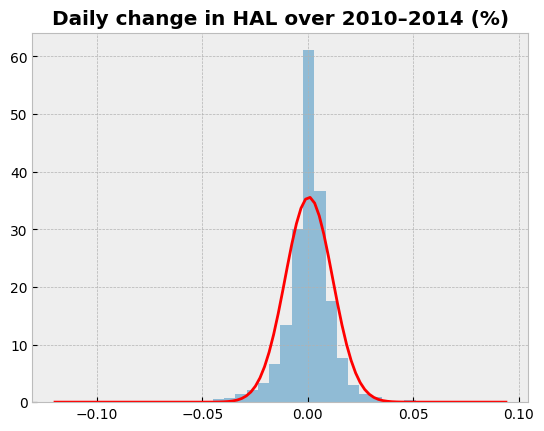

In [ ]:
support = numpy.linspace(returns.min(), returns.max(), 100)
returns.hist(bins=40, density=True, histtype="stepfilled", alpha=0.5);
plt.plot(support, scipy.stats.norm.pdf(support,loc=mean,scale=sigma), "r-")
plt.title("Daily change in HAL over 2010–2014 (%)", weight="bold");

In [ ]:
csv = "/content/sample_data/california_housing_train.csv"

In [ ]:
import pandas as pd
df = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


# New section

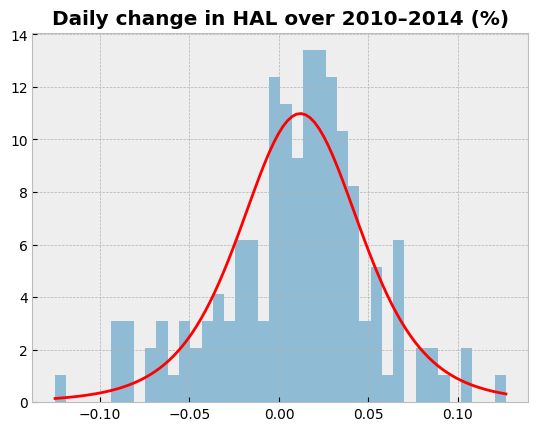

In [ ]:
support = numpy.linspace(returns.min(), returns.max(), 100)
returns.hist(bins=40, density=True, histtype="stepfilled", alpha=0.5);
plt.plot(support, scipy.stats.t.pdf(support,loc=tmean,scale=tsigma,df=tdf), "r-")
plt.title("Daily change in HAL over 2010–2014 (%)", weight="bold");

In [ ]:
scipy.stats.norm.ppf(0.05, mean, sigma)

-0.01799887264581368

In [ ]:
scipy.stats.norm.ppf(0.01,mean,sigma)

-0.02564239563962628

In [ ]:
mean

0.00044952449437661823

Value at Risk using the Monte Carlo method

Method: run many trials with random market conditions, calculating portfolio loss for each trial. Use the aggregated trial data to establish a profile of the portfolio’s risk characteristics.

Hypothesis: stock market evolution can be simulated by geometric Brownian motion

We start by defining some parameters of the geometric Brownian motion.

In [ ]:
days = 1000   # time horizon
dt = 1/float(days)
sigma = 0.01121 # volatility
mu = 0.00044952449437661823  # drift (average growth rate)

In [ ]:
def random_walk(startprice):
    price = numpy.zeros(days)
    shock = numpy.zeros(days)
    price[0] = startprice
    for i in range(1, days):
        shock[i] = numpy.random.normal(loc=mu * dt, scale=sigma * numpy.sqrt(dt))
        price[i] = max(0, price[i-1] + shock[i] * price[i-1])
    return price

Let’s simulate 100 random walks, starting from an initial stock price of 4800 USD, for a duration of 300 days.

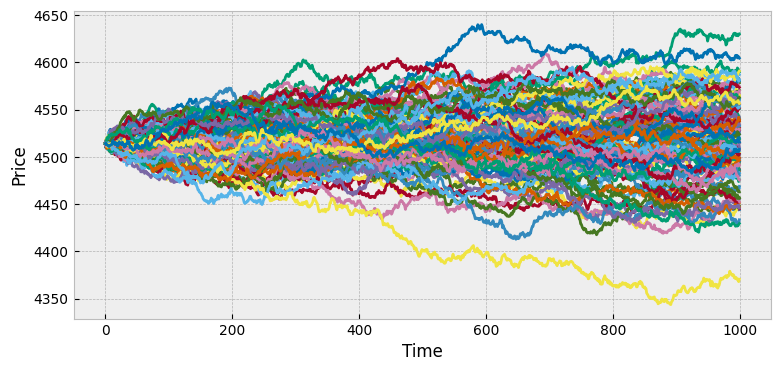

In [ ]:
plt.figure(figsize=(9,4))
for run in range(100):
    plt.plot(random_walk(4514))
plt.xlabel("Time")
plt.ylabel("Price");

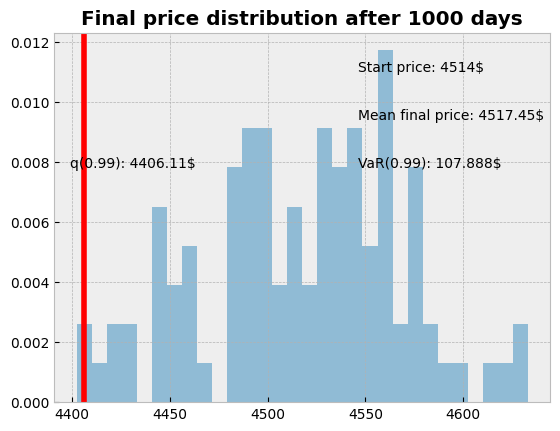

In [ ]:
runs = 100
simulations = numpy.zeros(runs)
numpy.random.seed(42)
for run in range(runs):
    simulations[run] = random_walk(4514)[days-1]
q = numpy.percentile(simulations, 1)
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price: 4514$")
plt.figtext(0.6, 0.7, "Mean final price: {:.6}$".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.6}$".format(4514 - q))
plt.figtext(0.15, 0.6, "q(0.99): {:.6}$".format(q))
plt.axvline(x=q, linewidth=4, color="r")
plt.title("Final price distribution after {} days".format(days), weight="bold");

In [ ]:
runs = 100
simulations = numpy.zeros(runs)
np.random.seed(42)
for run in range(runs):
    simulations[run] = random_walk(4514)[days-1]
q = numpy.percentile(simulations, 1)
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price: 4514$")
plt.figtext(0.6, 0.7, "Mean final price: {:.6}$".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.6}$".format(4514 - q))
plt.figtext(0.15, 0.6, "q(0.99): {:.6}$".format(q))
plt.axvline(x=q, linewidth=4, color="r")
plt.title("Final price distribution after {} days".format(days), weight="bold");

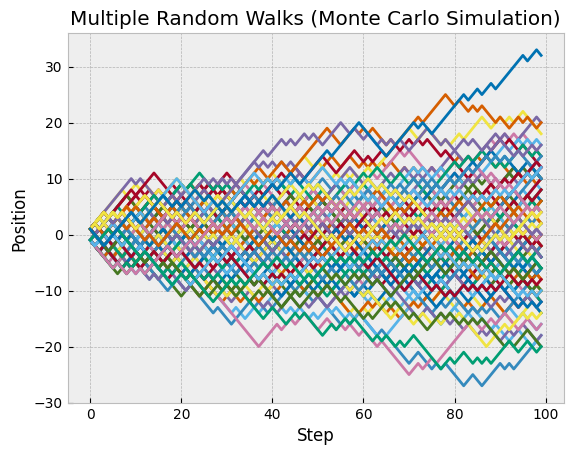

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Number of steps in each random walk
num_steps = 100

# Number of random walks
num_walks = 100

# Generate multiple random walks
walks = np.cumsum(np.random.choice([-1, 1], size=(num_walks, num_steps)), axis=1)

# Plot each random walk
for i in range(num_walks):
    plt.plot(walks[i], label=f'Walk {i+1}')

plt.title('Multiple Random Walks (Monte Carlo Simulation)')
plt.xlabel('Step')
plt.ylabel('Position')
plt.show()

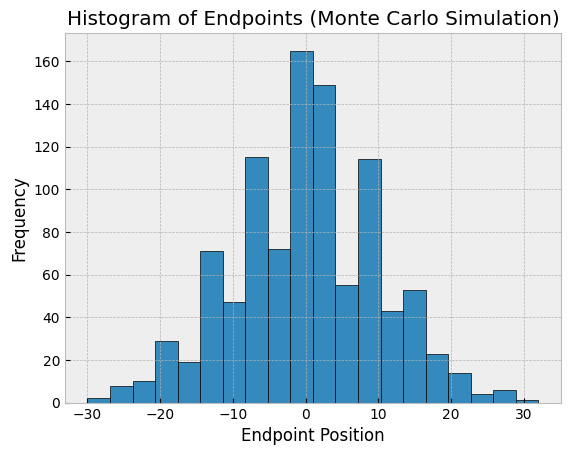

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Number of steps in each random walk
num_steps = 100

# Number of random walks
num_walks = 1000

# Generate multiple random walks
walks = np.cumsum(np.random.choice([-1, 1], size=(num_walks, num_steps)), axis=1)

# Extract the endpoint of each random walk
endpoints = walks[:, -1]

# Plot the histogram of endpoints
plt.hist(endpoints, bins=20, edgecolor='black')
plt.title('Histogram of Endpoints (Monte Carlo Simulation)')
plt.xlabel('Endpoint Position')
plt.ylabel('Frequency')
plt.show()


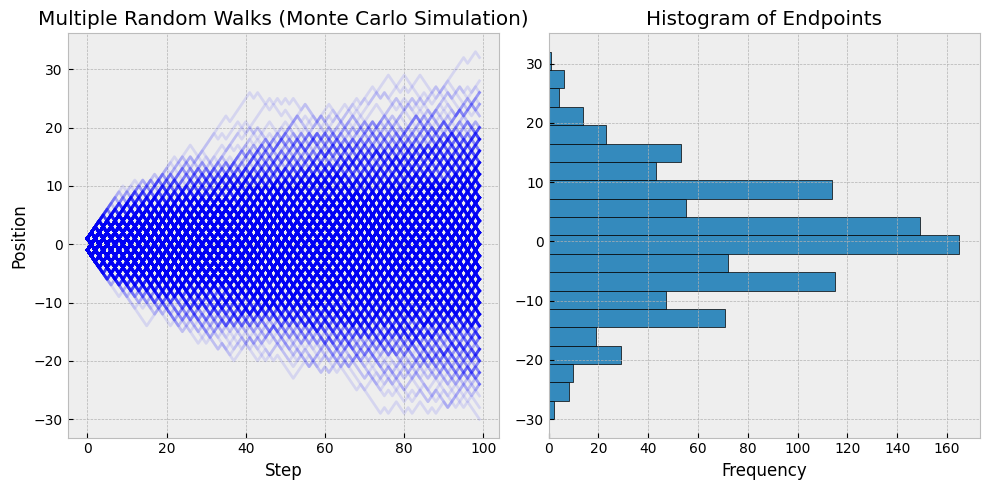

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Number of steps in each random walk
num_steps = 100

# Number of random walks
num_walks = 1000

# Generate multiple random walks
walks = np.cumsum(np.random.choice([-1, 1], size=(num_walks, num_steps)), axis=1)

# Extract the endpoint of each random walk
endpoints = walks[:, -1]

# Plot multiple random walks
plt.figure(figsize=(10, 5))

# Subplot for random walks
plt.subplot(1, 2, 1)
for i in range(num_walks):
    plt.plot(walks[i], color='blue', alpha=0.1)

plt.title('Multiple Random Walks (Monte Carlo Simulation)')
plt.xlabel('Step')
plt.ylabel('Position')

# Subplot for histogram
plt.subplot(1, 2, 2)
plt.hist(endpoints, bins=20, edgecolor='black', orientation='horizontal')
plt.title('Histogram of Endpoints')
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()


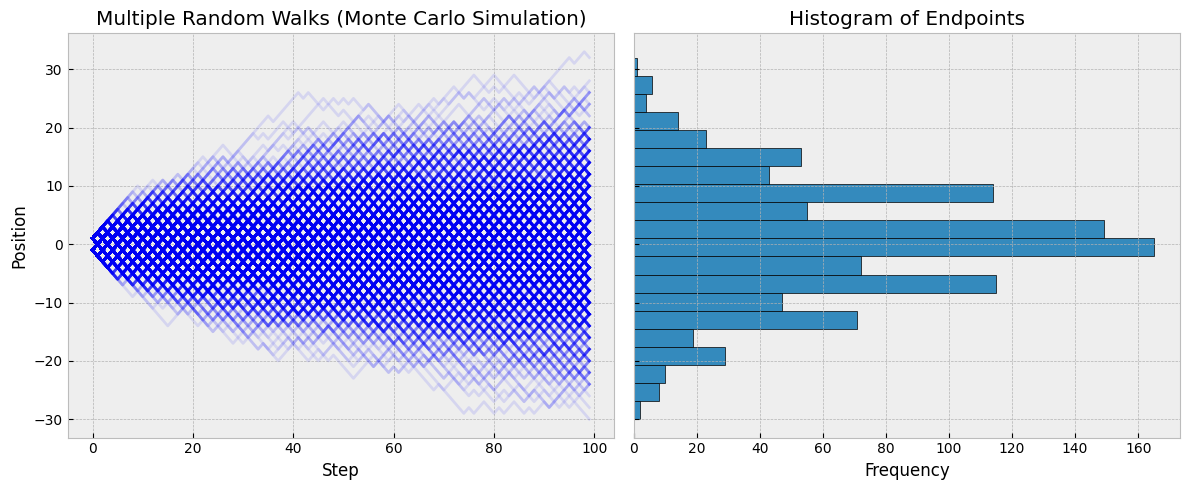

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Number of steps in each random walk
num_steps = 100

# Number of random walks
num_walks = 1000

# Generate multiple random walks
walks = np.cumsum(np.random.choice([-1, 1], size=(num_walks, num_steps)), axis=1)

# Extract the endpoint of each random walk
endpoints = walks[:, -1]

# Create subplots with shared y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot multiple random walks
for i in range(num_walks):
    ax1.plot(walks[i], color='blue', alpha=0.1)

ax1.set_title('Multiple Random Walks (Monte Carlo Simulation)')
ax1.set_xlabel('Step')
ax1.set_ylabel('Position')

# Plot histogram in the second subplot
ax2.hist(endpoints, bins=20, edgecolor='black', orientation='horizontal')
ax2.set_title('Histogram of Endpoints')
ax2.set_xlabel('Frequency')
#ax2.set_ylabel('Endpoint Position')

plt.tight_layout()
plt.show()


In [ ]:
def retrieve_stock_data_daily(ticker, start, end):
    json = YahooFinancials(ticker).get_historical_price_data(start, end, "daily")
    df = pandas.DataFrame(columns=["open","close","adjclose"])
    for row in json[ticker]["prices"]:
        date = datetime.fromisoformat(row["formatted_date"])
        df.loc[date] = [row["open"], row["close"], row["adjclose"]]
    df.index.name = "date"
    return df

In [ ]:
SP500 = retrieve_stock_data_daily("^SPX","2010-01-01","2023-11-17")
FTSE = retrieve_stock_data_daily("^FTSE","2010-01-01","2023-11-17")
CAC40 = retrieve_stock_data_daily("^FCHI","2010-01-01","2023-11-17")
VIX = retrieve_stock_data_daily("^VIX","2010-01-01","2023-11-17")
NIKKEI = retrieve_stock_data_daily("^N225","2010-01-01","2023-11-17")

In [ ]:
MOVE = retrieve_stock_data_daily("^MOVE","2010-01-01","2023-11-17")

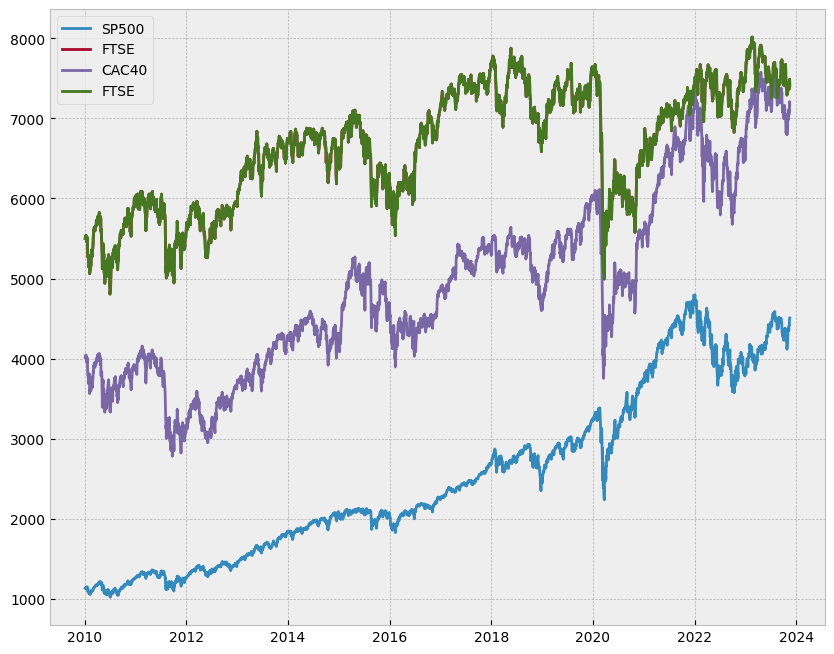

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(SP500["close"],label="SP500")
plt.plot(FTSE["close"],label="FTSE")
plt.plot(CAC40["close"],label="CAC40")
plt.plot(FTSE["close"],label="FTSE")
plt.legend(loc=2)

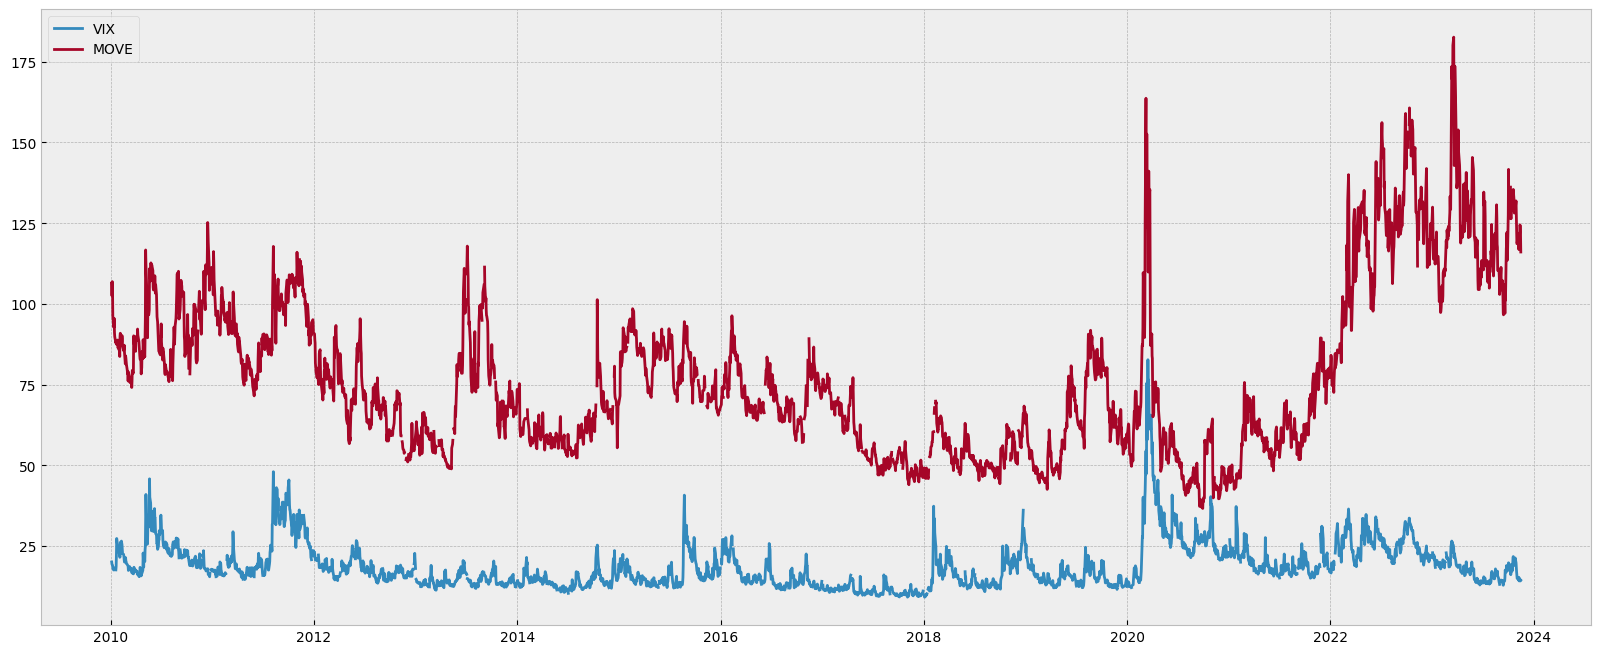

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
plt.plot(VIX["close"],label="VIX")
plt.plot(MOVE["close"],label="MOVE")
plt.legend(loc=2)

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
SP500["Log_ret"] = np.log(SP500["close"] / SP500["close"].shift(1))
FTSE["Log_ret"] = np.log(FTSE["close"] / FTSE["close"].shift(1))
CAC40["Log_ret"] = np.log(CAC40["close"] / CAC40["close"].shift(1))
NIKKEI["Log_ret"] = np.log(NIKKEI["close"] / NIKKEI["close"].shift(1))

In [ ]:
returns = pd.DataFrame()

In [ ]:
fear_index = pd.DataFrame()

In [ ]:
returns["SP500"] = SP500["Log_ret"]
returns["FTSE"] = FTSE["Log_ret"]
returns["CAC40"] = CAC40["Log_ret"]
returns["NIKKEI"] = NIKKEI["Log_ret"]
returns["VIX"] = VIX["close"]
returns["MOVE"] = MOVE["close"]


In [ ]:
fear_index["VIX"] = VIX["close"]
fear_index["MOVE"] = MOVE["close"]
fear_index

,VIX,MOVE
date,,
2010-01-04,20.040001,106.400002
2010-01-05,19.350000,102.500000
2010-01-06,19.160000,106.900002
2010-01-07,19.059999,104.400002
2010-01-08,18.129999,96.300003
...,...,...
2023-11-10,14.170000,116.790001
2023-11-13,14.760000,124.470001
2023-11-14,14.160000,124.110001


In [ ]:
returns

,SP500,FTSE,CAC40,NIKKEI,VIX
date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,20.040001
2010-01-05,0.003111,0.004028,-0.000264,0.002535,19.350000
2010-01-06,0.000545,0.001357,0.001185,0.004635,19.160000
2010-01-07,0.003993,-0.000597,0.001773,-0.004650,19.059999
2010-01-08,0.002878,0.001356,0.005041,0.010862,18.129999
...,...,...,...,...,...
2023-11-10,0.015496,-0.012837,-0.009693,-0.002403,14.170000
2023-11-13,-0.000836,0.008819,0.005947,0.000522,14.760000
2023-11-14,0.018895,0.001978,0.013820,0.003395,14.160000


In [ ]:
df_corr = pd.DataFrame(returns)

In [ ]:
fear_corr = pd.DataFrame(fear_index)

<Axes: xlabel='date'>

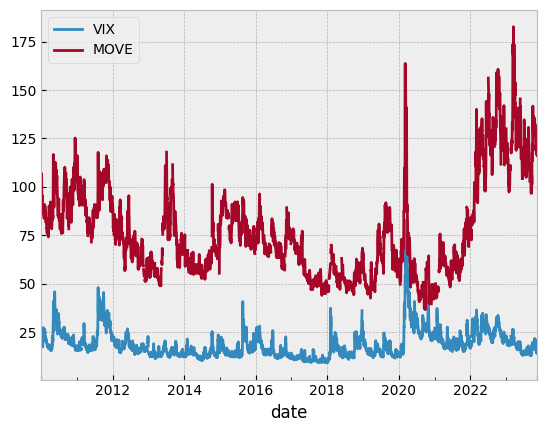

In [ ]:
fear_corr.plot()

<Axes: >

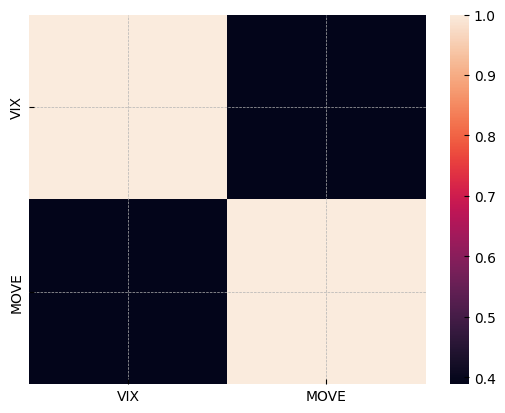

In [ ]:
sns.heatmap(fear_index.corr())

<Axes: >

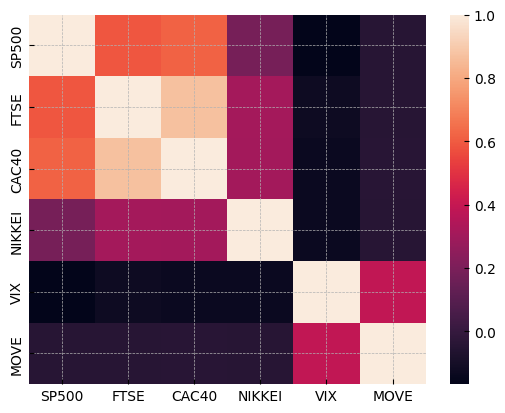

In [ ]:
sns.heatmap(df_corr.corr())

In [ ]:
df_corr.corr()

,SP500,FTSE,CAC40,NIKKEI,VIX
SP500,1.000000,0.588417,0.617084,0.188544,-0.166491
FTSE,0.588417,1.000000,0.870699,0.311593,-0.124656
CAC40,0.617084,0.870699,1.000000,0.305653,-0.132475
NIKKEI,0.188544,0.311593,0.305653,1.000000,-0.130696
VIX,-0.166491,-0.124656,-0.132475,-0.130696,1.000000


<Axes: >

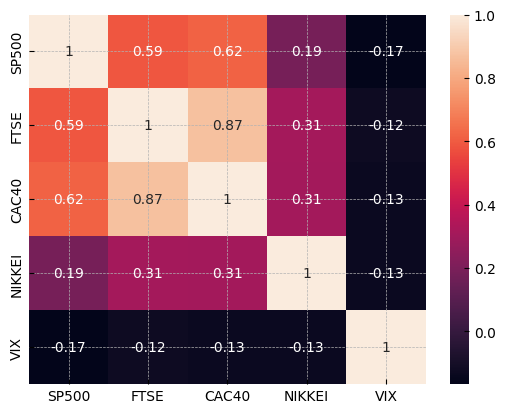

In [ ]:
sns.heatmap(df_corr.corr(),annot=True)

<Axes: >

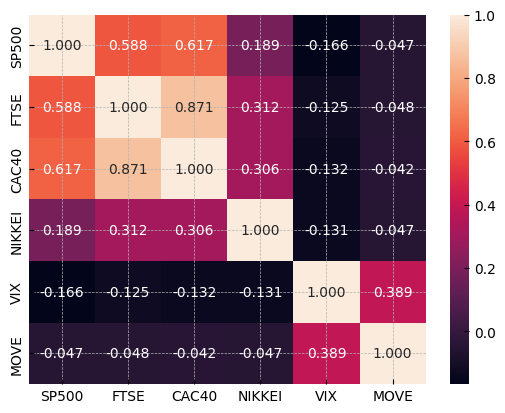

In [ ]:
sns.heatmap(df_corr.corr(), annot=True, fmt=".3f")

In [ ]:
# MOVE Index : Bond volatility



In [ ]:
returns = returns.dropna()
returns

,SP500,FTSE,CAC40,NIKKEI,VIX,MOVE
date,,,,,,
2010-01-05,0.003111,0.004028,-0.000264,0.002535,19.350000,102.500000
2010-01-06,0.000545,0.001357,0.001185,0.004635,19.160000,106.900002
2010-01-07,0.003993,-0.000597,0.001773,-0.004650,19.059999,104.400002
2010-01-08,0.002878,0.001356,0.005041,0.010862,18.129999,96.300003
2010-01-12,-0.009425,-0.007140,-0.010702,0.007457,18.250000,92.699997
...,...,...,...,...,...,...
2023-11-10,0.015496,-0.012837,-0.009693,-0.002403,14.170000,116.790001
2023-11-13,-0.000836,0.008819,0.005947,0.000522,14.760000,124.470001
2023-11-14,0.018895,0.001978,0.013820,0.003395,14.160000,124.110001


In [ ]:
# Create equal weighted portfolio
portfolio_stock = 0.25*returns["SP500"] + 0.25*returns["CAC40"] + 0.25*returns["FTSE"] + 0.25*returns["NIKKEI"]
portfolio_fear = 0.5*returns["VIX"] + 0.5*returns["MOVE"]

<Axes: xlabel='date'>

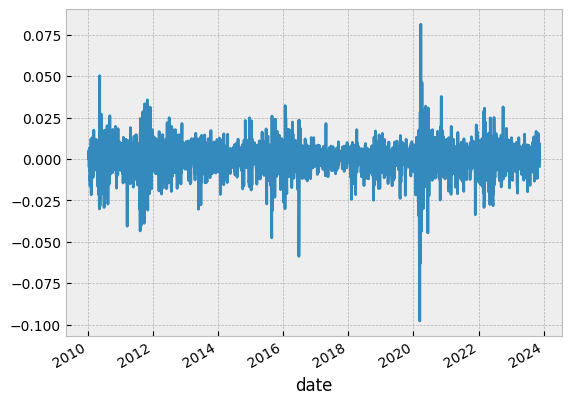

In [ ]:
portfolio_stock.plot()

<Axes: xlabel='date'>

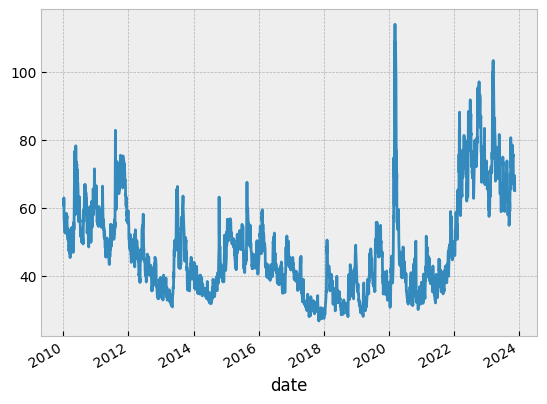

In [ ]:
portfolio_fear.plot()

Text(0.5, 1.0, 'Monthly returns on our portfolio since 2000')

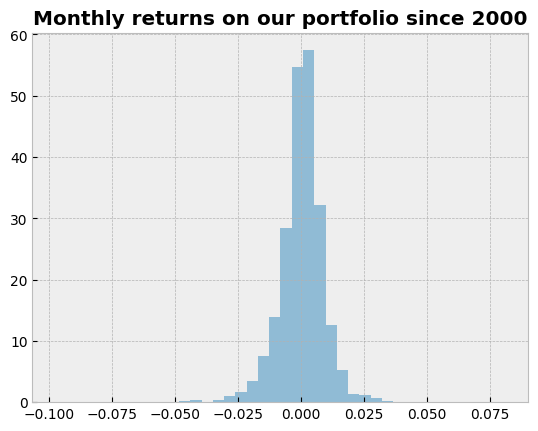

In [ ]:
mean = portfolio_stock.mean()
sigma = portfolio_stock.std()
tdf, tmean, tsigma = scipy.stats.t.fit(portfolio_stock)
portfolio_stock.hist(bins=40, density=True, histtype="stepfilled", alpha=0.5)
plt.title("Monthly returns on our portfolio since 2000", weight="bold")

Text(0.5, 1.0, 'Monthly returns on our portfolio since 2000')

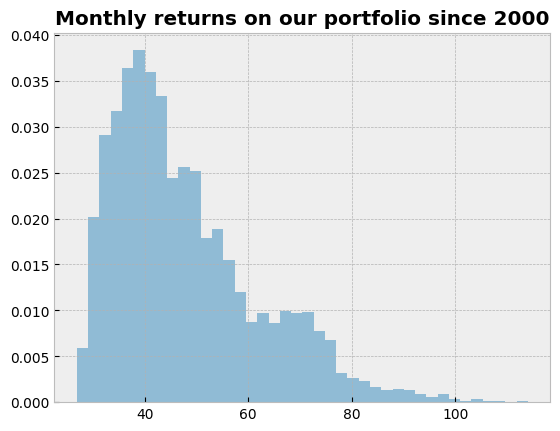

In [ ]:
mean = portfolio_fear.mean()
sigma = portfolio_fear.std()
tdf, tmean, tsigma = scipy.stats.t.fit(portfolio_fear)
portfolio_fear.hist(bins=40, density=True, histtype="stepfilled", alpha=0.5)
plt.title("Monthly returns on our portfolio of fear since 2000", weight="bold")

In [ ]:
portfolio_stock.quantile(0.05)

-0.014165956664425737

In [ ]:
portfolio_fear.quantile(0.05)
#Look at the % change of VIX to get return

30.982499599456787

In [ ]:
returns["VIX"].quantile(0.05)

11.260000228881836

In [ ]:
returns["MOVE"].quantile(0.05)

47.327500343322754